<a href="https://colab.research.google.com/github/souptikmajumder/customer_conversion_for_educompany/blob/master/Lead_Scoring_Assignment_Vishak_Nair_Souptik_Majumder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing the libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
#To view all columns of the dataframe
pd.set_option('display.max_columns',500)

In [0]:
#Importing the dataset
lead = pd.read_csv('Leads.csv')

#### DATA UNDERSTANDING

In [0]:
#To view the head of the dataset
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [0]:
#Dimensions of the dataset
intial_lead_shape = lead.shape

In [0]:
#Info of the dataframe for initial spotting of missing values and identify type of the column.
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

<font color = green> We could see that there are many missing values in the dataset with many columns having missing values. We will observe and treat accordingly for the same later. Also we could see,almost many object/categorical columns in the dataset which might need to converted by suitable techniques such as one-hot encoding or simple replace, which also will be taken care of.

In [0]:
#Initial Stats of the dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


<font color = green> Among the numerical columns in hand, the initial stats shows the presence of outliers. As we observe above, features such as `TotalVisits,Total Time Spent on Website,Page Views Per Visit` are not gradually increasing, hence presence of outlier in the dataset.

In [0]:
#Checking for the percentage of null values for each column.
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

<font color = green> As seen above, we could find many columns with large number of missing values. Columns such as `Lead Quality,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Tags` are having high % of missing values. We need to go for certain approach, either to drop these columns or impute these missing values with appropriate values. For this, we can understand each feature and their importance by deep diving.

### DATA CLEANING

#### TREATMENT FOR NULL VALUES

In [0]:
#Observing the existing different levels for Lead Quality
lead['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [0]:
#Assessing the number of entries in lead-quality
from collections import Counter      
Counter(lead['Lead Quality'])

Counter({'Low in Relevance': 583,
         nan: 4767,
         'Might be': 1560,
         'Not Sure': 1092,
         'Worst': 601,
         'High in Relevance': 637})

<font color = green> 51.6% of the values for `Lead Quality` are not present. We can replace the null values with a new level say 'Unknown'. From the different levels for Lead quality we can see levels 'Might be' or 'Not Sure' will be almost similar to 'Unknown. Hence we will go with imputing 'Not Sure' values for the same.

In [0]:
#Replacing the missing values with 'Not Sure' category for 'Lead Quality'
lead['Lead Quality'].replace(np.nan,'Not Sure',inplace=True)

In [0]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [0]:
Counter(lead['Asymmetrique Activity Index'])

Counter({'02.Medium': 3839, '01.High': 821, '03.Low': 362, nan: 4218})

In [0]:
Counter(lead['Asymmetrique Profile Index'])

Counter({'02.Medium': 2788, '01.High': 2203, '03.Low': 31, nan: 4218})

<font color = green> We can see that same amount of Null values for the columns `Asymmetrique Activity Index and Asymmetrique Profile Index` which are closely related and mostly these both columns would be empty for same records. We could see around 45.7% of these are missing values. Hence imputing this with mode can introduce bias here. We can impute/replace the null values here with a new level `Unknown`.

In [0]:
#Replacing the missing values with 'Unknown' category for 'Asymmetrique Activity Index'
lead['Asymmetrique Activity Index'].replace(np.nan,'Unknown',inplace=True)

In [0]:
#Replacing the missing values with 'Unknown' category for 'Asymmetrique Profile Index'
lead['Asymmetrique Profile Index'].replace(np.nan,'Unknown',inplace=True)

<font color = green> Similar approach can be done for the `Asymmetrique Activity Score and  Asymmetrique Profile Score` columns which are also having same amount of NULL values. But interesting thing here is, these columns are continuous features and we can see the distribution of these features.

In [0]:
lead['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

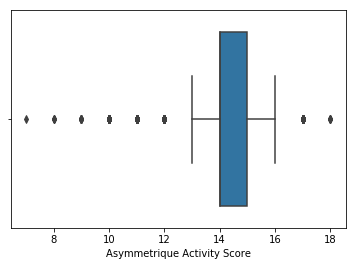

In [0]:
sns.boxplot(lead['Asymmetrique Activity Score'])

In [0]:
lead['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

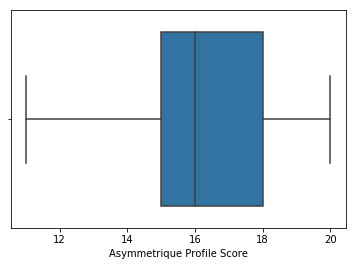

In [0]:
sns.boxplot(lead['Asymmetrique Profile Score'])

<font color = green> We can see the different unique values and their counts in the dataset. Again ` Asymmetrique Activity Score and  Asymmetrique Profile Score` are having high number of missing values. But imputing those values with whatever values should not change the initial distribution of the variable.

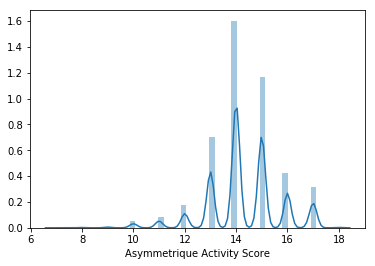

In [0]:
sns.distplot(lead['Asymmetrique Activity Score'].dropna())

In [0]:
#Replacing the missing values with mean value for 'Asymmetrique Activity Score'
lead['Asymmetrique Activity Score'].replace(np.nan,lead['Asymmetrique Activity Score'].mean(),inplace=True)

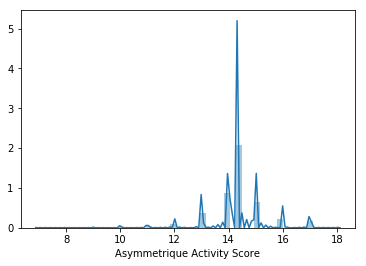

In [0]:
sns.distplot(lead['Asymmetrique Activity Score'])

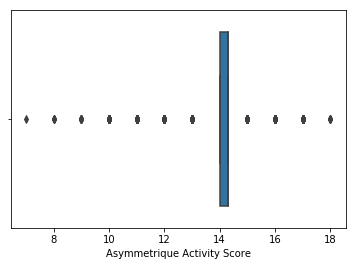

In [0]:
sns.boxplot(lead['Asymmetrique Activity Score'])

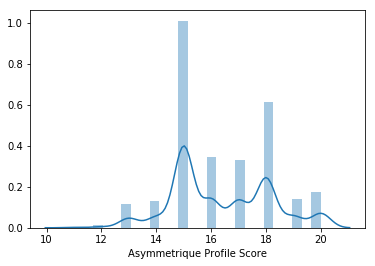

In [0]:
sns.distplot(lead['Asymmetrique Profile Score'].dropna())

In [0]:
#Replacing the missing values with mean value for 'Asymmetrique Profile Score'
lead['Asymmetrique Profile Score'].replace(np.nan,lead['Asymmetrique Profile Score'].mean(),inplace=True)

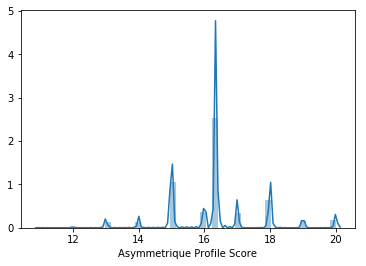

In [0]:
sns.distplot(lead['Asymmetrique Profile Score'])

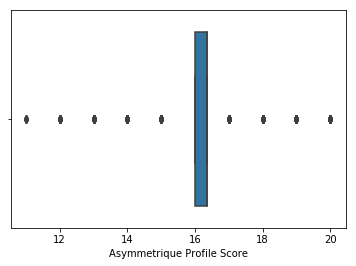

In [0]:
sns.boxplot(lead['Asymmetrique Profile Score'])

<font color = green> We can see that, for the Profile Score after imputing with the mean value does introduce some outliers (this is introduced due to large number of null values replaced with mean values), but that is better than imputing with 0 as it changes the distribution of the profile scores.

In [0]:
Counter(lead['Tags'])

Counter({'Interested in other courses': 513,
         'Ringing': 1203,
         'Will revert after reading the email': 2072,
         nan: 3353,
         'Lost to EINS': 175,
         'In confusion whether part time or DLP': 5,
         'Busy': 186,
         'switched off': 240,
         'in touch with EINS': 12,
         'Already a student': 465,
         'Diploma holder (Not Eligible)': 63,
         'Graduation in progress': 111,
         'Closed by Horizzon': 358,
         'number not provided': 27,
         'opp hangup': 33,
         'Not doing further education': 145,
         'invalid number': 83,
         'wrong number given': 47,
         'Interested  in full time MBA': 117,
         'Still Thinking': 6,
         'Lost to Others': 7,
         'Shall take in the next coming month': 2,
         'Lateral student': 3,
         'Interested in Next batch': 5,
         'Recognition issue (DEC approval)': 1,
         'Want to take admission but has financial problems': 6,
         'Uni

In [0]:
#Replacing the missing values with 'Unknown' category for 'Tags'
lead['Tags'].replace(np.nan,'Unknown',inplace=True)

In [0]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [0]:
Counter(lead['What matters most to you in choosing a course'])

Counter({'Better Career Prospects': 6528,
         nan: 2709,
         'Flexibility & Convenience': 2,
         'Other': 1})

<font color = green> We could find the motive behind most of the people who choose this course is for Better Career Prospects. We can hence impute the missing values hence with the mode here.

In [0]:
lead['What matters most to you in choosing a course'].fillna(lead['What matters most to you in choosing a course'].mode()[0],inplace=True) #imputing with mode

In [0]:
Counter(lead['Lead Profile'])

Counter({'Select': 4146,
         'Potential Lead': 1613,
         nan: 2709,
         'Other Leads': 487,
         'Lateral Student': 24,
         'Dual Specialization Student': 20,
         'Student of SomeSchool': 241})

<font color = green> Here the customer can be either be a potential Lead or a Lateral which we cannot know. Also, we could see the level `Select` is as  similar as the value null. Hence we can replace both these values with a new level 'Unknown', instead of imputing with the values.

In [0]:
#Replacing the missing values as well for 'Select' with 'Unknown' category for 'Lead Profile'
lead['Lead Profile'].replace(np.nan,'Unknown',inplace=True)
lead['Lead Profile'].replace('Select','Unknown',inplace=True)

In [0]:
Counter(lead['Lead Profile'])

Counter({'Unknown': 6855,
         'Potential Lead': 1613,
         'Other Leads': 487,
         'Lateral Student': 24,
         'Dual Specialization Student': 20,
         'Student of SomeSchool': 241})

In [0]:
Counter(lead['What is your current occupation'])

Counter({'Unemployed': 5600,
         'Student': 210,
         nan: 2690,
         'Working Professional': 706,
         'Businessman': 8,
         'Other': 16,
         'Housewife': 10})

<font color = green> Again the approach of imputing mode here to the value 'Unempoyed' won't be a good approach, since the customer can be rated based on whether the customer is a student/working professional or unemployed. We can see a column `Other`,which can be used to add all the missing values.

In [0]:
lead['What is your current occupation'].fillna(lead['What is your current occupation'].mode()[0],inplace=True)

In [0]:
Counter(lead['What is your current occupation'])

Counter({'Unemployed': 8290,
         'Student': 210,
         'Working Professional': 706,
         'Businessman': 8,
         'Other': 16,
         'Housewife': 10})

In [0]:
Counter(lead['Country'])

Counter({nan: 2461,
         'India': 6492,
         'Russia': 1,
         'Kuwait': 4,
         'Oman': 6,
         'United Arab Emirates': 53,
         'United States': 69,
         'Australia': 13,
         'United Kingdom': 15,
         'Bahrain': 7,
         'Ghana': 2,
         'Singapore': 24,
         'Qatar': 10,
         'Saudi Arabia': 21,
         'Belgium': 2,
         'France': 6,
         'Sri Lanka': 1,
         'China': 2,
         'Canada': 4,
         'Netherlands': 2,
         'Sweden': 3,
         'Nigeria': 4,
         'Hong Kong': 7,
         'Germany': 4,
         'Asia/Pacific Region': 2,
         'Uganda': 2,
         'Kenya': 1,
         'Italy': 2,
         'South Africa': 4,
         'Tanzania': 1,
         'unknown': 5,
         'Malaysia': 1,
         'Liberia': 1,
         'Switzerland': 1,
         'Denmark': 1,
         'Philippines': 2,
         'Bangladesh': 2,
         'Vietnam': 1,
         'Indonesia': 1})

<font color = green> Although we can see the highest number of customers are from `India`, still for many missing values as large as 2461, for those customers, the target branding and promotional activities will be stressed based on the number of customers in the country. Hence imputing mode won't be a good option. Also a level 'unknown' can be seen in the list of countries. We can replace null values with this category of 'unknown'.

In [0]:
lead['Country'].replace(np.nan,'unknown',inplace=True)

In [0]:
Counter(lead['Country'])

Counter({'unknown': 2466,
         'India': 6492,
         'Russia': 1,
         'Kuwait': 4,
         'Oman': 6,
         'United Arab Emirates': 53,
         'United States': 69,
         'Australia': 13,
         'United Kingdom': 15,
         'Bahrain': 7,
         'Ghana': 2,
         'Singapore': 24,
         'Qatar': 10,
         'Saudi Arabia': 21,
         'Belgium': 2,
         'France': 6,
         'Sri Lanka': 1,
         'China': 2,
         'Canada': 4,
         'Netherlands': 2,
         'Sweden': 3,
         'Nigeria': 4,
         'Hong Kong': 7,
         'Germany': 4,
         'Asia/Pacific Region': 2,
         'Uganda': 2,
         'Kenya': 1,
         'Italy': 2,
         'South Africa': 4,
         'Tanzania': 1,
         'Malaysia': 1,
         'Liberia': 1,
         'Switzerland': 1,
         'Denmark': 1,
         'Philippines': 2,
         'Bangladesh': 2,
         'Vietnam': 1,
         'Indonesia': 1})

In [0]:
Counter(lead['How did you hear about X Education'])

Counter({'Select': 5043,
         'Word Of Mouth': 348,
         'Other': 186,
         nan: 2207,
         'Online Search': 808,
         'Multiple Sources': 152,
         'Advertisements': 70,
         'Student of SomeSchool': 310,
         'Email': 26,
         'Social Media': 67,
         'SMS': 23})

<font color = green> Here we can see along with missing values,categories - 'Select' and 'Other'. We can merge all these values into a single category of Other.

In [0]:
lead['How did you hear about X Education'].replace(np.nan,'Other',inplace=True)
lead['How did you hear about X Education'].replace('Select','Other',inplace=True)

In [0]:
Counter(lead['How did you hear about X Education'])

Counter({'Other': 7436,
         'Word Of Mouth': 348,
         'Online Search': 808,
         'Multiple Sources': 152,
         'Advertisements': 70,
         'Student of SomeSchool': 310,
         'Email': 26,
         'Social Media': 67,
         'SMS': 23})

In [0]:
Counter(lead['City'])

Counter({'Select': 2249,
         'Mumbai': 3222,
         nan: 1420,
         'Thane & Outskirts': 752,
         'Other Metro Cities': 380,
         'Other Cities': 686,
         'Other Cities of Maharashtra': 457,
         'Tier II Cities': 74})

<font color = green> We will place `Select`, missing values into a single category of 'Other Cities'.

In [0]:
lead['City'].replace(np.nan,lead['City'].mode()[0],inplace=True)
lead['City'].replace('Select',lead['City'].mode()[0],inplace=True)

In [0]:
Counter(lead['Specialization'])

Counter({'Select': 1942,
         'Business Administration': 403,
         'Media and Advertising': 203,
         nan: 1438,
         'Supply Chain Management': 349,
         'IT Projects Management': 366,
         'Finance Management': 976,
         'Travel and Tourism': 203,
         'Human Resource Management': 848,
         'Marketing Management': 838,
         'Banking, Investment And Insurance': 338,
         'International Business': 178,
         'E-COMMERCE': 112,
         'Operations Management': 503,
         'Retail Management': 100,
         'Services Excellence': 40,
         'Hospitality Management': 114,
         'Rural and Agribusiness': 73,
         'Healthcare Management': 159,
         'E-Business': 57})

In [0]:
lead['Specialization'].replace(np.nan,'Unknown',inplace=True)
lead['Specialization'].replace('Select','Unknown',inplace=True)

In [0]:
lead.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
How did you hear about X Education                 0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                             

<font color = green> We have now treated almost major portion of the null values present in the dataset. Now we are having very small amount of null values for which those records can be removed which won't result in major loosing of information.

In [0]:
lead = lead.loc[lead['TotalVisits'].isnull() !=True] 
lead = lead.loc[lead['Page Views Per Visit'].isnull() !=True] 
lead = lead.loc[lead['Last Activity'].isnull() !=True] 
lead = lead.loc[lead['Lead Source'].isnull() !=True] 

In [0]:
lead.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

<font color = green>Hence now data is cleaned and doesn't contain any NULL values.

<font color = green> We can observe that the column `Prospect ID` which helps in identifying the customer can be dropped,since the `Lead Number` is also a similar column with unique values that can identify each customer.

In [0]:
lead.drop(['Prospect ID'],axis=1,inplace=True)

In [0]:
#Dimensions of final dataset after data cleaning
lead.shape

(9074, 36)

In [0]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,Unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Unknown,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Unknown,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Other,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Unknown,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Unknown,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [0]:
lead['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

In [0]:
lead['Lead Source'].replace('google','Google',inplace=True)

#### DATA INBALANCE

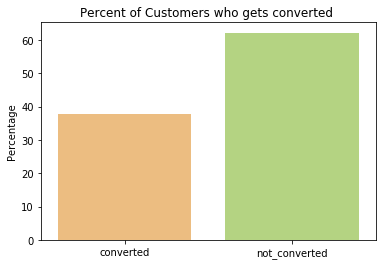

In [0]:
#Data Inbalance check for the Converted column.
yes=lead[lead['Converted']==1]['Converted'].value_counts()
no=lead[lead['Converted']==0]['Converted'].value_counts()

converted=np.array((yes/len(lead))*100) 
not_converted=np.array((no/len(lead))*100) 
stat_summ=pd.DataFrame({'Percentage':[converted[0],not_converted[0]]},index=['converted','not_converted'])
sns.barplot(x=stat_summ.index,y=stat_summ['Percentage'],palette='RdYlGn')
plt.title('Percent of Customers who gets converted ')
plt.show()

<font color = green>We can see a little bit of Data Inbalance between these 2 categories of converted and Not converted. We can see out of total percentage around 30%+ ~ nearly 40% of the leads are only getting converted which supports the initial claim that `The typical lead conversion rate at X education is around 30%.`

<font color = green> We can check now all the columns with `Binary response` i.e with only levels - Yes and No.

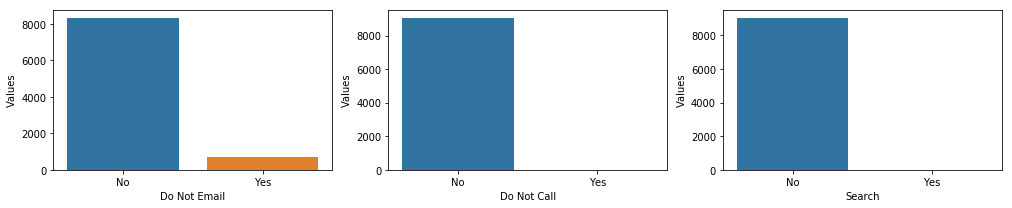

In [0]:
plt.figure(figsize=(17,10))
plt.subplot(3,3,1)
temp = lead['Do Not Email'].value_counts()
df2 = pd.DataFrame({'Do Not Email': temp.index,'Values': temp.values})
sns.barplot(x = 'Do Not Email', y= 'Values', data=df2)
locs, labels = plt.xticks()
plt.subplot(3,3,2)
temp = lead['Do Not Call'].value_counts()
df3 = pd.DataFrame({'Do Not Call': temp.index,'Values': temp.values})
sns.barplot(x = 'Do Not Call', y= 'Values', data=df3)
locs, labels = plt.xticks()
plt.subplot(3,3,3)
temp = lead['Search'].value_counts()
df4 = pd.DataFrame({'Search': temp.index,'Values': temp.values})
sns.barplot(x = 'Search', y= 'Values', data=df4)
locs, labels = plt.xticks()
plt.show()

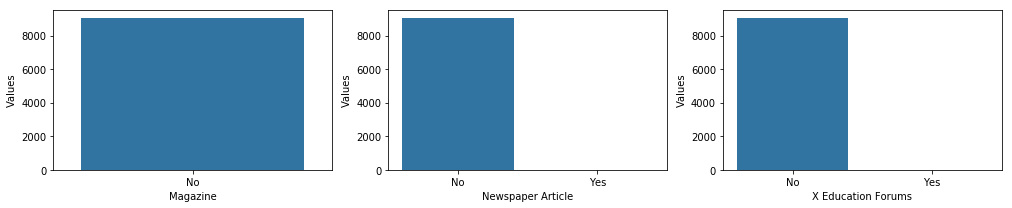

In [0]:
plt.figure(figsize=(17,10))
plt.subplot(3,3,1)
temp = lead['Magazine'].value_counts()
df2 = pd.DataFrame({'Magazine': temp.index,'Values': temp.values})
sns.barplot(x = 'Magazine', y= 'Values', data=df2)
locs, labels = plt.xticks()
plt.subplot(3,3,2)
temp = lead['Newspaper Article'].value_counts()
df3 = pd.DataFrame({'Newspaper Article': temp.index,'Values': temp.values})
sns.barplot(x = 'Newspaper Article', y= 'Values', data=df3)
locs, labels = plt.xticks()
plt.subplot(3,3,3)
temp = lead['X Education Forums'].value_counts()
df4 = pd.DataFrame({'X Education Forums': temp.index,'Values': temp.values})
sns.barplot(x = 'X Education Forums', y= 'Values', data=df4)
locs, labels = plt.xticks()
plt.show()

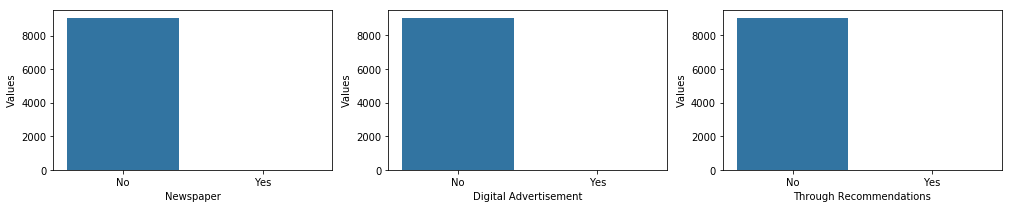

In [0]:
plt.figure(figsize=(17,10))
plt.subplot(3,3,1)
temp = lead['Newspaper'].value_counts()
df2 = pd.DataFrame({'Newspaper': temp.index,'Values': temp.values})
sns.barplot(x = 'Newspaper', y= 'Values', data=df2)
locs, labels = plt.xticks()
plt.subplot(3,3,2)
temp = lead['Digital Advertisement'].value_counts()
df3 = pd.DataFrame({'Digital Advertisement': temp.index,'Values': temp.values})
sns.barplot(x = 'Digital Advertisement', y= 'Values', data=df3)
locs, labels = plt.xticks()
plt.subplot(3,3,3)
temp = lead['Through Recommendations'].value_counts()
df4 = pd.DataFrame({'Through Recommendations': temp.index,'Values': temp.values})
sns.barplot(x = 'Through Recommendations', y= 'Values', data=df4)
locs, labels = plt.xticks()
plt.show()

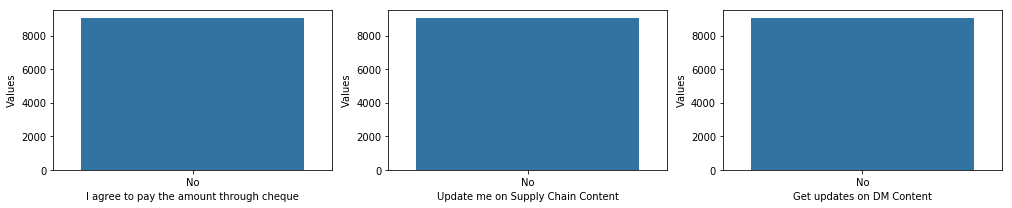

In [0]:
plt.figure(figsize=(17,10))
plt.subplot(3,3,1)
temp = lead['I agree to pay the amount through cheque'].value_counts()
df2 = pd.DataFrame({'I agree to pay the amount through cheque': temp.index,'Values': temp.values})
sns.barplot(x = 'I agree to pay the amount through cheque', y= 'Values', data=df2)
locs, labels = plt.xticks()
plt.subplot(3,3,2)
temp = lead['Update me on Supply Chain Content'].value_counts()
df3 = pd.DataFrame({'Update me on Supply Chain Content': temp.index,'Values': temp.values})
sns.barplot(x = 'Update me on Supply Chain Content', y= 'Values', data=df3)
locs, labels = plt.xticks()
plt.subplot(3,3,3)
temp = lead['Get updates on DM Content'].value_counts()
df4 = pd.DataFrame({'Get updates on DM Content': temp.index,'Values': temp.values})
sns.barplot(x = 'Get updates on DM Content', y= 'Values', data=df4)
locs, labels = plt.xticks()
plt.show()

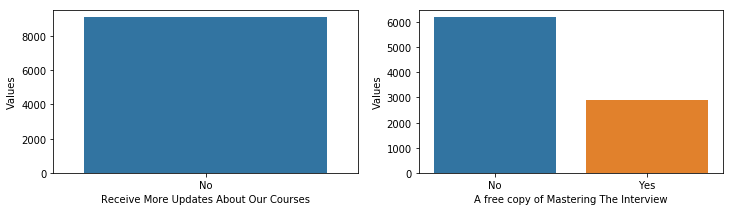

In [0]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
temp = lead['Receive More Updates About Our Courses'].value_counts()
df2 = pd.DataFrame({'Receive More Updates About Our Courses': temp.index,'Values': temp.values})
sns.barplot(x = 'Receive More Updates About Our Courses', y= 'Values', data=df2)
locs, labels = plt.xticks()
plt.subplot(1,2,2)
temp = lead['A free copy of Mastering The Interview'].value_counts()
df3 = pd.DataFrame({'A free copy of Mastering The Interview': temp.index,'Values': temp.values})
sns.barplot(x = 'A free copy of Mastering The Interview', y= 'Values', data=df3)
locs, labels = plt.xticks()
plt.show()

<font color = green> <b> From all the above barplots we can see that almost all of these Binary columns are highly inbalanced and have got either only one value or very high inbalance ratio. Hence, all these columns won't add any relevant information and give us variance for model building. Hence we can go ahead and drop these columns.Along with this, we can also drop the column `A free copy of Mastering The Interview`,even though there is not much of a data inbalance. This column doesn't feel to be an important contributor in finding potential lead,since this value just indicate more of a complimentary offer provided to the customers.

<font color = green> The column `'What matters most to you in choosing a course'` as well most of the leads have mentioned as the reason Better Career Prospects and hence heavily inbalanced. We can remove this column as well.

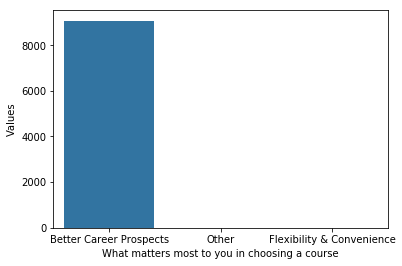

In [0]:
temp = lead['What matters most to you in choosing a course'].value_counts()
df3 = pd.DataFrame({'What matters most to you in choosing a course': temp.index,'Values': temp.values})
sns.barplot(x = 'What matters most to you in choosing a course', y= 'Values', data=df3)
locs, labels = plt.xticks()
plt.show()

In [0]:
lead.drop(['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','I agree to pay the amount through cheque','Update me on Supply Chain Content','Get updates on DM Content','Receive More Updates About Our Courses','A free copy of Mastering The Interview','What matters most to you in choosing a course'],axis=1,inplace=True)


In [0]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,unknown,Unknown,Other,Unemployed,Interested in other courses,Low in Relevance,Unknown,Mumbai,02.Medium,02.Medium,15.0,15.0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Unknown,Other,Unemployed,Ringing,Not Sure,Unknown,Mumbai,02.Medium,02.Medium,15.0,15.0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Other,Student,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Not Sure,Unknown,Mumbai,02.Medium,01.High,13.0,17.0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Other,Unemployed,Will revert after reading the email,Might be,Unknown,Mumbai,02.Medium,01.High,15.0,18.0,Modified


In [0]:
lead.shape

(9074, 21)

#### OUTLIER ANALYSIS AND TREATMENT

<font color = green> We can take the Numerical features and see for the existence of outliers and their impact and treat it accordingly.

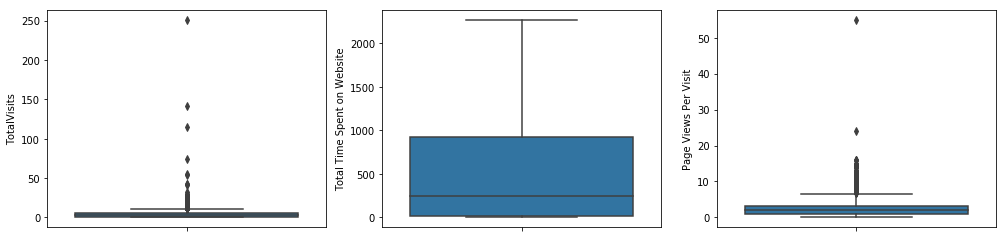

In [0]:
#Ditribution for some of the numerical features.
plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
sns.boxplot(y=lead['TotalVisits'])
plt.subplot(1,3,2)
sns.boxplot(y=lead['Total Time Spent on Website'])
plt.subplot(1,3,3)
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

<font color = green> We can clearly spot outliers in the features such as `TotalVisits and Page Views Per Visit`. Total time spent on Website doesn't have any outliers. We can see that there are as many as 250 visits recorded for total visits by possible leads. As high as this number of visits to a website seems to be not like a correct capture and hence we can remove these outliers. Similarly for the page views per visit, as many as 20+ page views in a single visit seems to be not correct. We can remove these as well.!

In [0]:
#Removing the outlier for TotalVisits
Q1 = lead['TotalVisits'].quantile(0.05)
Q3 = lead['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
lead = lead[(lead['TotalVisits'] >= Q1) & (lead['TotalVisits'] <= Q3)]

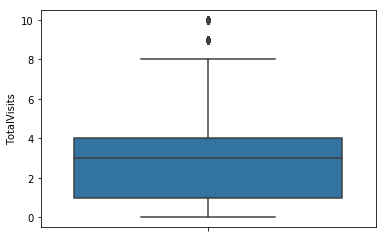

In [0]:
sns.boxplot(y=lead['TotalVisits'])

In [0]:
#Removing the outlier for 'Page Views Per Visit'
Q1 = lead['Page Views Per Visit'].quantile(0.05)
Q3 = lead['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
lead = lead[(lead['Page Views Per Visit'] >= Q1) & (lead['Page Views Per Visit'] <= Q3)]

In [0]:
lead.shape

(8445, 21)

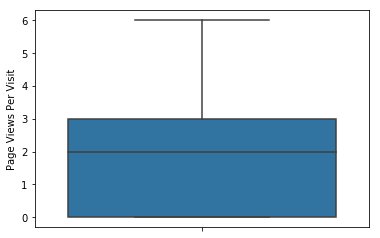

In [0]:
sns.boxplot(y=lead['Page Views Per Visit'])

In [0]:
100*(lead.shape[0]/intial_lead_shape[0])

91.3961038961039

<font color = green> After the data cleaning process,we are left with 91.4% of the data,hence we can proceed with this dataset further for model building process.

#### DATA PREPARATION

In [0]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,unknown,Unknown,Other,Unemployed,Interested in other courses,Low in Relevance,Unknown,Mumbai,02.Medium,02.Medium,15.0,15.0,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Unknown,Other,Unemployed,Ringing,Not Sure,Unknown,Mumbai,02.Medium,02.Medium,15.0,15.0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Other,Student,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Not Sure,Unknown,Mumbai,02.Medium,01.High,13.0,17.0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Other,Unemployed,Will revert after reading the email,Might be,Unknown,Mumbai,02.Medium,01.High,15.0,18.0,Modified


##### Encoding the categorical features

In [0]:
lead['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import'],
      dtype=object)

In [0]:
lead['Asymmetrique Activity Index'].replace(['02.Medium','01.High','03.Low','Unknown'],[2,1,3,0],inplace=True)
lead['Asymmetrique Profile Index'].replace(['02.Medium','01.High','03.Low','Unknown'],[2,1,3,0],inplace=True)

In [0]:
lead = pd.get_dummies(lead, columns=['Lead Origin'], prefix = ['Lead_Origin'],drop_first=True)

In [0]:
lead['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Live Chat', 'welearnblog_Home', 'youtubechannel', 'Click2call',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [0]:
lead = pd.get_dummies(lead, columns=['Lead Source'], prefix = ['Lead_Source'],drop_first=True)

In [0]:
lead['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'Unsubscribed', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Approached upfront', 'Resubscribed to emails', 'Email Received',
       'Email Marked Spam'], dtype=object)

In [0]:
lead = pd.get_dummies(lead, columns=['Last Activity'], prefix = ['Last_Activity'],drop_first=True)

In [0]:
lead['Specialization'].unique()

array(['Unknown', 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Human Resource Management',
       'Marketing Management', 'Banking, Investment And Insurance',
       'Travel and Tourism', 'International Business', 'E-COMMERCE',
       'Operations Management', 'Hospitality Management',
       'Retail Management', 'Rural and Agribusiness',
       'Healthcare Management', 'Services Excellence', 'E-Business'],
      dtype=object)

In [0]:
lead = pd.get_dummies(lead, columns=['Specialization'], prefix = ['Specialization'],drop_first=True)

In [0]:
lead['How did you hear about X Education'].unique()

array(['Other', 'Word Of Mouth', 'Online Search', 'Multiple Sources',
       'Advertisements', 'Student of SomeSchool', 'Email', 'Social Media',
       'SMS'], dtype=object)

In [0]:
lead = pd.get_dummies(lead, columns=['How did you hear about X Education'], prefix = ['How_did_u_hear'],drop_first=True)

In [0]:
lead['What is your current occupation'].unique()

array(['Unemployed', 'Student', 'Working Professional', 'Businessman',
       'Other', 'Housewife'], dtype=object)

In [0]:
lead = pd.get_dummies(lead, columns=['What is your current occupation'], prefix = ['occupation'],drop_first=True)

In [0]:
lead['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Unknown', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'number not provided',
       'opp hangup', 'Closed by Horizzon', 'Graduation in progress',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [0]:
lead = pd.get_dummies(lead, columns=['Tags'], prefix = ['Tags'],drop_first=True)

In [0]:
lead['Lead Quality'].unique()

array(['Low in Relevance', 'Not Sure', 'Might be', 'Worst',
       'High in Relevance'], dtype=object)

In [0]:
lead = pd.get_dummies(lead, columns=['Lead Quality'], prefix = ['Lead_Quality'],drop_first=True)

In [0]:
lead['Lead Profile'].unique()

array(['Unknown', 'Potential Lead', 'Other Leads',
       'Dual Specialization Student', 'Student of SomeSchool',
       'Lateral Student'], dtype=object)

In [0]:
lead = pd.get_dummies(lead, columns=['Lead Profile'], prefix = ['Lead_Profile'],drop_first=True)

In [0]:
lead['Last Notable Activity'].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Had a Phone Conversation', 'Olark Chat Conversation',
       'Unsubscribed', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [0]:
lead = pd.get_dummies(lead, columns=['Last Notable Activity'], prefix = ['Last_Notable_Activity'],drop_first=True)

In [0]:
lead['City'].value_counts()

Mumbai                         6347
Thane & Outskirts               669
Other Cities                    612
Other Cities of Maharashtra     409
Other Metro Cities              341
Tier II Cities                   67
Name: City, dtype: int64

In [0]:
lead['Country'].value_counts()

India                   5892
unknown                 2290
United States             65
United Arab Emirates      47
Singapore                 23
Saudi Arabia              20
United Kingdom            13
Australia                 12
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     5
Germany                    4
Kuwait                     4
Canada                     4
Nigeria                    4
South Africa               3
Uganda                     2
Philippines                2
Ghana                      2
Italy                      2
Sweden                     2
Asia/Pacific Region        2
China                      2
Belgium                    2
Bangladesh                 2
Tanzania                   1
Malaysia                   1
Russia                     1
Vietnam                    1
Liberia                    1
Indonesia                  1
Netherlands                1
Denmark       

<font color = green> The count for each of the country shows that the majority of the leads are from India and from city Mumbai. So all the other values are not providing much of an information here. Hence we can go ahead and drop these columns rather than doing encoding for all the different levels.

In [0]:
lead.drop(['City','Country'],axis=1,inplace=True)

<font color = green> Hence we have done data cleaning for Null values,Outlier treatment,checked for duplicate categories and finally converted all the categorical columns into numerical. We will observe the final dataset now.

In [0]:
lead.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,How_did_u_hear_Email,How_did_u_hear_Multiple Sources,How_did_u_hear_Online Search,How_did_u_hear_Other,How_did_u_hear_SMS,How_did_u_hear_Social Media,How_did_u_hear_Student of SomeSchool,How_did_u_hear_Word Of Mouth,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Quality_Low in Relevance,Lead_Quality_Might be,Lead_Quality_Not Sure,Lead_Quality_Worst,Lead_Profile_Lateral Student,Lead_Profile_Other Leads,Lead_Profile_Potential Lead,Lead_Profile_Student of SomeSchool,Lead_Profile_Unknown,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,2,2,15.0,15.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,

In [0]:
#Dimensions of the final dataset.
lead.shape

(8445, 128)

In [0]:
final_lead = lead.copy()

##### DATASET IS READY!!

#### TRAIN-TEST SPLIT

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#Placing all the feature variables into X and the response feature into y.
X = lead.drop(['Lead Number','Converted'],axis=1)
y = lead['Converted']

In [0]:
#Dataframe for Lead Number and index
lead_num_array = lead['Lead Number']
lead_df = pd.DataFrame(lead_num_array)

In [0]:
lead_df['Lead_index'] = lead.index

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

#### FEATURE SCALING

In [0]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,How_did_u_hear_Email,How_did_u_hear_Multiple Sources,How_did_u_hear_Online Search,How_did_u_hear_Other,How_did_u_hear_SMS,How_did_u_hear_Social Media,How_did_u_hear_Student of SomeSchool,How_did_u_hear_Word Of Mouth,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Quality_Low in Relevance,Lead_Quality_Might be,Lead_Quality_Not Sure,Lead_Quality_Worst,Lead_Profile_Lateral Student,Lead_Profile_Other Leads,Lead_Profile_Potential Lead,Lead_Profile_Student of SomeSchool,Lead_Profile_Unknown,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
5279,2.0,195,2.0,0,0,14.306252,16.344883,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
X_train[cols] = scaler.fit_transform(X_train[cols])

In [0]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Facebook,Lead_Source_Google,Lead_Source_Live Chat,Lead_Source_NC_EDM,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Pay per Click Ads,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Social Media,Lead_Source_WeLearn,Lead_Source_Welingak Website,Lead_Source_bing,Lead_Source_blog,Lead_Source_testone,Lead_Source_welearnblog_Home,Lead_Source_youtubechannel,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Marked Spam,Last_Activity_Email Opened,Last_Activity_Email Received,Last_Activity_Form Submitted on Website,Last_Activity_Had a Phone Conversation,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_Resubscribed to emails,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Last_Activity_View in browser link Clicked,Last_Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,How_did_u_hear_Email,How_did_u_hear_Multiple Sources,How_did_u_hear_Online Search,How_did_u_hear_Other,How_did_u_hear_SMS,How_did_u_hear_Social Media,How_did_u_hear_Student of SomeSchool,How_did_u_hear_Word Of Mouth,occupation_Housewife,occupation_Other,occupation_Student,occupation_Unemployed,occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead_Quality_Low in Relevance,Lead_Quality_Might be,Lead_Quality_Not Sure,Lead_Quality_Worst,Lead_Profile_Lateral Student,Lead_Profile_Other Leads,Lead_Profile_Potential Lead,Lead_Profile_Student of SomeSchool,Lead_Profile_Unknown,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
5279,-0.314975,-0.504462,-0.037025,-1.013779,-0.977676,0.002842,0.011352,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

<font color = green> All the features are scaled now.

#### MODEL BUILDING

In [0]:
X_train.shape

(5911, 126)

<font color = green> Since we are having as many as 126 features with us, we can use the RFE to find out the only relevant/important contributor features and drop the rest for model building.

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

In [0]:
rfe = RFE(logreg,25)
rfe = rfe.fit(X_train,y_train)

In [0]:
columns = col = X_train.columns[rfe.support_]
columns

Index(['Total Time Spent on Website', 'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Welingak Website',
       'Last_Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested in other courses', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Unknown', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead_Quality_Worst',
       'Lead_Profile_Student of SomeSchool', 'Lead_Profile_Unknown',
       'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_SMS Sent'],
      dtype='object')

<font color = green> We will take the above columns suggested by the RFE as per the weightage given by RFE and take it forward and build logistic model and see what can it offer.

In [0]:
#Importing the statsmodels library
import statsmodels.api as sm

In [0]:
# Creating X_test_RFE dataframe with RFE selected variables
X_train_RFE = X_train[columns]

In [0]:
model1 = sm.GLM(y_train,(sm.add_constant(X_train[columns])),family=sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5885
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1102.2
Date:                Mon, 26 Aug 2019   Deviance:                       2204.5
Time:                        22:24:58   Pearson chi2:                 1.06e+04
No. Iterations:                    24   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4592      0.330     -4.417      0.000      -2.107      -0.812
Total Time Spent on Website                       0.9583      0.059     16.342      0.000       0.843       1.073
Lead_Origin_Landing Page Submission              -1.1831      0.127     -9.280      0.000      -1.433      -0.933
Lead_Origin_Lead Add Form                         0.3952      0.470      0.840      0.401      -0.526       1.317
Lead_Source_Welingak Website                      4.4728      1.119      3.998      0.000       2.280       6.666
Last_Activity_SMS Sent                            1.3422      0.235      5.722      0.000       0.882       1.802
Tags_Busy                                         2.5312      0.387      6.535      0.000       1.772       3.290
Tags_Closed by Horizzon                           8.1241      0.797     10.196      0.000       6.562       9.686
Tags_Diploma holder (Not Eligible)              -21.8701   2.96e+04     -0.001      0.999   -5.81e+04     5.8e+04
Tags_Interested in other courses                 -0.2482      0.479     -0.518      0.604      -1.187       0.690
Tags_Lateral student                             27.6027   1.21e+05      0.000      1.000   -2.36e+05    2.36e+05
Tags_Lost to EINS                                 8.4896      0.853      9.950      0.000       6.817      10.162
Tags_Not doing further education                 -0.8126      1.088     -0.747      0.455      -2.945       1.320
Tags_Ringing                                     -2.0862      0.409     -5.103      0.000      -2.887      -1.285
Tags_Unknown                                      1.7852      0.324      5.504      0.000       1.149       2.421
Tags_Will revert after reading the email          5.9224      0.356     16.632      0.000       5.224       6.620
Tags_invalid number                             -22.6188   2.75e+04     -0.001      0.999    -5.4e+04     5.4e+04
Tags_number not provided                        -22.8036   4.46e+04     -0.001      1.000   -8.74e+04    8.74e+04
Tags_switched off                                -2.7073      0.802     -3.375      0.001      -4.279      -1.135
Tags_wrong number given                         -23.6339   3.43e+04     -0.001      0.999   -6.73e+04    6.73e+04
Lead_Quality_Worst                               -1.8345      0.810     -2.264      0.024      -3.423      -0.246
Lead_Profile_Student of SomeSchool               -1.5290      0.942     -1.623      0.105      -3.376       0.317
Lead_Profile_Unknown                             -1.1966      0.221     -5.412      0.000      -1.630      -0.763
Last_Notable_Activity_Modified                   -1.4348      0.155     -9.247      0.000      -1.739      -1.131
Last_Notable_Activity_Olark Chat Conversation    -1.9020      0.503     -3.783      

<font color = green> We can see there are some features that are not significant in our model, based on the p-values of the columns. We can remove these features one by one and analyse.

<font color = green> We can see feature `Tags_Lateral student` is with p-value. Hence we can go and drop this column and build model again.

In [0]:
X_train_RFE.drop(['Tags_Lateral student'],axis=1,inplace=True)

In [0]:
model2 = sm.GLM(y_train,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5886
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1108.1
Date:                Mon, 26 Aug 2019   Deviance:                       2216.2
Time:                        22:24:58   Pearson chi2:                 1.07e+04
No. Iterations:                    24   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2670      0.313     -4.052      0.000      -1.880      -0.654
Total Time Spent on Website                       0.9532      0.058     16.316      0.000       0.839       1.068
Lead_Origin_Landing Page Submission              -1.1945      0.127     -9.385      0.000      -1.444      -0.945
Lead_Origin_Lead Add Form                         0.5028      0.463      1.086      0.277      -0.405       1.410
Lead_Source_Welingak Website                      4.3565      1.116      3.904      0.000       2.169       6.544
Last_Activity_SMS Sent                            1.4112      0.232      6.077      0.000       0.956       1.866
Tags_Busy                                         2.3229      0.370      6.281      0.000       1.598       3.048
Tags_Closed by Horizzon                           7.8921      0.785     10.049      0.000       6.353       9.431
Tags_Diploma holder (Not Eligible)              -22.0484   2.96e+04     -0.001      0.999    -5.8e+04     5.8e+04
Tags_Interested in other courses                 -0.4463      0.466     -0.958      0.338      -1.360       0.467
Tags_Lost to EINS                                 8.3229      0.854      9.751      0.000       6.650       9.996
Tags_Not doing further education                 -0.9852      1.083     -0.910      0.363      -3.107       1.137
Tags_Ringing                                     -2.2972      0.392     -5.853      0.000      -3.066      -1.528
Tags_Unknown                                      1.5718      0.302      5.199      0.000       0.979       2.164
Tags_Will revert after reading the email          5.7164      0.337     16.985      0.000       5.057       6.376
Tags_invalid number                             -22.8168   2.75e+04     -0.001      0.999   -5.39e+04    5.39e+04
Tags_number not provided                        -23.0039   4.45e+04     -0.001      1.000   -8.73e+04    8.72e+04
Tags_switched off                                -2.9143      0.794     -3.669      0.000      -4.471      -1.358
Tags_wrong number given                         -23.8262   3.44e+04     -0.001      0.999   -6.74e+04    6.73e+04
Lead_Quality_Worst                               -1.9371      0.805     -2.407      0.016      -3.514      -0.360
Lead_Profile_Student of SomeSchool               -1.5309      0.929     -1.648      0.099      -3.352       0.290
Lead_Profile_Unknown                             -1.1809      0.219     -5.403      0.000      -1.609      -0.753
Last_Notable_Activity_Modified                   -1.4341      0.155     -9.262      0.000      -1.738      -1.131
Last_Notable_Activity_Olark Chat Conversation    -1.9000      0.502     -3.784      0.000      -2.884      -0.916
Last_Notable_Activity_SMS Sent                    0.8218      0.270      3.044      

<font color = green> We can see feature `Tags_number not provided` is with p-value. Hence we can go and drop this column and build model again.

In [0]:
X_train_RFE.drop(['Tags_number not provided'],axis=1,inplace=True)

In [0]:
model3 = sm.GLM(y_train,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
model3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5887
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1109.6
Date:                Mon, 26 Aug 2019   Deviance:                       2219.2
Time:                        22:24:59   Pearson chi2:                 1.08e+04
No. Iterations:                    24   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3573      0.312     -4.355      0.000      -1.968      -0.746
Total Time Spent on Website                       0.9555      0.058     16.359      0.000       0.841       1.070
Lead_Origin_Landing Page Submission              -1.1998      0.127     -9.433      0.000      -1.449      -0.951
Lead_Origin_Lead Add Form                         0.5114      0.465      1.100      0.271      -0.400       1.423
Lead_Source_Welingak Website                      4.3453      1.117      3.891      0.000       2.157       6.534
Last_Activity_SMS Sent                            1.4153      0.232      6.091      0.000       0.960       1.871
Tags_Busy                                         2.4342      0.367      6.641      0.000       1.716       3.153
Tags_Closed by Horizzon                           7.9975      0.784     10.195      0.000       6.460       9.535
Tags_Diploma holder (Not Eligible)              -21.9484   2.96e+04     -0.001      0.999    -5.8e+04     5.8e+04
Tags_Interested in other courses                 -0.3446      0.464     -0.742      0.458      -1.255       0.565
Tags_Lost to EINS                                 8.4175      0.850      9.898      0.000       6.751      10.084
Tags_Not doing further education                 -0.8890      1.083     -0.821      0.412      -3.011       1.233
Tags_Ringing                                     -2.1835      0.389     -5.620      0.000      -2.945      -1.422
Tags_Unknown                                      1.6848      0.298      5.650      0.000       1.100       2.269
Tags_Will revert after reading the email          5.8217      0.334     17.428      0.000       5.167       6.476
Tags_invalid number                             -22.7037   2.75e+04     -0.001      0.999    -5.4e+04    5.39e+04
Tags_switched off                                -2.7984      0.792     -3.533      0.000      -4.351      -1.246
Tags_wrong number given                         -23.7191   3.44e+04     -0.001      0.999   -6.73e+04    6.73e+04
Lead_Quality_Worst                               -1.9126      0.805     -2.377      0.017      -3.490      -0.335
Lead_Profile_Student of SomeSchool               -1.5142      0.937     -1.617      0.106      -3.350       0.321
Lead_Profile_Unknown                             -1.1985      0.218     -5.488      0.000      -1.627      -0.770
Last_Notable_Activity_Modified                   -1.4366      0.155     -9.273      0.000      -1.740      -1.133
Last_Notable_Activity_Olark Chat Conversation    -1.9021      0.502     -3.786      0.000      -2.887      -0.918
Last_Notable_Activity_SMS Sent                    0.8067      0.270      2.990      0.003       0.278       1.336
====================================================================================

<font color = green> We can see feature `Tags_Diploma holder (Not Eligible)` is with p-value. Hence we can go and drop this column and build model again.

In [0]:
X_train_RFE.drop(['Tags_Diploma holder (Not Eligible)'],axis=1,inplace=True)

In [0]:
model4 = sm.GLM(y_train,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
model4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5888
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1110.9
Date:                Mon, 26 Aug 2019   Deviance:                       2221.8
Time:                        22:24:59   Pearson chi2:                 1.08e+04
No. Iterations:                    23   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4325      0.310     -4.619      0.000      -2.040      -0.825
Total Time Spent on Website                       0.9545      0.058     16.365      0.000       0.840       1.069
Lead_Origin_Landing Page Submission              -1.2008      0.127     -9.440      0.000      -1.450      -0.951
Lead_Origin_Lead Add Form                         0.5170      0.466      1.109      0.268      -0.397       1.431
Lead_Source_Welingak Website                      4.3388      1.117      3.883      0.000       2.149       6.529
Last_Activity_SMS Sent                            1.4143      0.232      6.091      0.000       0.959       1.869
Tags_Busy                                         2.5174      0.365      6.903      0.000       1.803       3.232
Tags_Closed by Horizzon                           8.0789      0.784     10.306      0.000       6.543       9.615
Tags_Interested in other courses                 -0.2593      0.463     -0.560      0.575      -1.167       0.648
Tags_Lost to EINS                                 8.5029      0.851      9.990      0.000       6.835      10.171
Tags_Not doing further education                 -0.7968      1.082     -0.736      0.462      -2.918       1.324
Tags_Ringing                                     -2.1032      0.387     -5.436      0.000      -2.862      -1.345
Tags_Unknown                                      1.7702      0.295      5.991      0.000       1.191       2.349
Tags_Will revert after reading the email          5.9008      0.332     17.749      0.000       5.249       6.552
Tags_invalid number                             -21.6171   1.67e+04     -0.001      0.999   -3.27e+04    3.27e+04
Tags_switched off                                -2.7172      0.791     -3.434      0.001      -4.268      -1.166
Tags_wrong number given                         -22.6402   2.08e+04     -0.001      0.999   -4.08e+04    4.08e+04
Lead_Quality_Worst                               -1.9978      0.794     -2.516      0.012      -3.554      -0.442
Lead_Profile_Student of SomeSchool               -1.4391      0.944     -1.524      0.127      -3.290       0.412
Lead_Profile_Unknown                             -1.2107      0.218     -5.551      0.000      -1.638      -0.783
Last_Notable_Activity_Modified                   -1.4334      0.155     -9.256      0.000      -1.737      -1.130
Last_Notable_Activity_Olark Chat Conversation    -1.8979      0.502     -3.778      0.000      -2.882      -0.913
Last_Notable_Activity_SMS Sent                    0.8130      0.270      3.014      0.003       0.284       1.342
=================================================================================================================
"""

<font color = green> We can see feature `Tags_invalid number` is with p-value. Hence we can go and drop this column and build model again.

In [0]:
X_train_RFE.drop(['Tags_invalid number'],axis=1,inplace=True)

In [0]:
model5 = sm.GLM(y_train,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
model5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5889
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1113.5
Date:                Mon, 26 Aug 2019   Deviance:                       2226.9
Time:                        22:24:59   Pearson chi2:                 1.08e+04
No. Iterations:                    22   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5794      0.308     -5.126      0.000      -2.183      -0.976
Total Time Spent on Website                       0.9583      0.058     16.437      0.000       0.844       1.073
Lead_Origin_Landing Page Submission              -1.2079      0.127     -9.502      0.000      -1.457      -0.959
Lead_Origin_Lead Add Form                         0.5325      0.469      1.135      0.256      -0.387       1.452
Lead_Source_Welingak Website                      4.3217      1.118      3.864      0.000       2.130       6.514
Last_Activity_SMS Sent                            1.4152      0.232      6.089      0.000       0.960       1.871
Tags_Busy                                         2.6869      0.361      7.441      0.000       1.979       3.395
Tags_Closed by Horizzon                           8.2369      0.783     10.517      0.000       6.702       9.772
Tags_Interested in other courses                 -0.1031      0.461     -0.224      0.823      -1.007       0.801
Tags_Lost to EINS                                 8.6475      0.848     10.203      0.000       6.986      10.309
Tags_Not doing further education                 -0.6445      1.082     -0.596      0.551      -2.765       1.476
Tags_Ringing                                     -1.9301      0.383     -5.045      0.000      -2.680      -1.180
Tags_Unknown                                      1.9406      0.291      6.665      0.000       1.370       2.511
Tags_Will revert after reading the email          6.0618      0.330     18.374      0.000       5.415       6.708
Tags_switched off                                -2.5413      0.789     -3.221      0.001      -4.088      -0.995
Tags_wrong number given                         -21.4739   1.26e+04     -0.002      0.999   -2.48e+04    2.47e+04
Lead_Quality_Worst                               -1.9712      0.793     -2.485      0.013      -3.526      -0.416
Lead_Profile_Student of SomeSchool               -1.4070      0.957     -1.471      0.141      -3.282       0.468
Lead_Profile_Unknown                             -1.2288      0.218     -5.640      0.000      -1.656      -0.802
Last_Notable_Activity_Modified                   -1.4310      0.155     -9.235      0.000      -1.735      -1.127
Last_Notable_Activity_Olark Chat Conversation    -1.8997      0.503     -3.779      0.000      -2.885      -0.915
Last_Notable_Activity_SMS Sent                    0.7974      0.270      2.957      0.003       0.269       1.326
=================================================================================================================
"""

<font color = green> We can see feature `Tags_wrong number given` is with p-value. Hence we can go and drop this column and build model again.

In [0]:
X_train_RFE.drop(['Tags_wrong number given'],axis=1,inplace=True)

In [0]:
model6 = sm.GLM(y_train,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
model6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5890
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1116.3
Date:                Mon, 26 Aug 2019   Deviance:                       2232.6
Time:                        22:25:00   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7292      0.308     -5.617      0.000      -2.333      -1.126
Total Time Spent on Website                       0.9578      0.058     16.441      0.000       0.844       1.072
Lead_Origin_Landing Page Submission              -1.2159      0.127     -9.568      0.000      -1.465      -0.967
Lead_Origin_Lead Add Form                         0.5466      0.471      1.160      0.246      -0.377       1.470
Lead_Source_Welingak Website                      4.3034      1.119      3.845      0.000       2.110       6.497
Last_Activity_SMS Sent                            1.4146      0.232      6.085      0.000       0.959       1.870
Tags_Busy                                         2.8387      0.360      7.882      0.000       2.133       3.545
Tags_Closed by Horizzon                           8.3748      0.784     10.689      0.000       6.839       9.910
Tags_Interested in other courses                  0.0391      0.461      0.085      0.932      -0.865       0.943
Tags_Lost to EINS                                 8.7672      0.844     10.383      0.000       7.112      10.422
Tags_Not doing further education                 -0.5004      1.081     -0.463      0.644      -2.620       1.619
Tags_Ringing                                     -1.7709      0.381     -4.650      0.000      -2.517      -1.025
Tags_Unknown                                      2.0845      0.291      7.162      0.000       1.514       2.655
Tags_Will revert after reading the email          6.2095      0.330     18.819      0.000       5.563       6.856
Tags_switched off                                -2.3813      0.788     -3.021      0.003      -3.926      -0.837
Lead_Quality_Worst                               -1.9094      0.796     -2.399      0.016      -3.469      -0.350
Lead_Profile_Student of SomeSchool               -1.3798      0.967     -1.427      0.154      -3.275       0.515
Lead_Profile_Unknown                             -1.2154      0.218     -5.587      0.000      -1.642      -0.789
Last_Notable_Activity_Modified                   -1.4295      0.155     -9.225      0.000      -1.733      -1.126
Last_Notable_Activity_Olark Chat Conversation    -1.9038      0.503     -3.787      0.000      -2.889      -0.918
Last_Notable_Activity_SMS Sent                    0.7799      0.269      2.895      0.004       0.252       1.308
=================================================================================================================
"""

<font color = green> We can see feature `Tags_Interested in other courses` is with p-value. Hence we can go and drop this column and build model again.

In [0]:
X_train_RFE.drop(['Tags_Interested in other courses'],axis=1,inplace=True)

In [0]:
model7 = sm.GLM(y_train,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
model7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5891
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1116.3
Date:                Mon, 26 Aug 2019   Deviance:                       2232.6
Time:                        22:25:00   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7165      0.269     -6.384      0.000      -2.243      -1.190
Total Time Spent on Website                       0.9578      0.058     16.441      0.000       0.844       1.072
Lead_Origin_Landing Page Submission              -1.2163      0.127     -9.578      0.000      -1.465      -0.967
Lead_Origin_Lead Add Form                         0.5464      0.471      1.160      0.246      -0.377       1.470
Lead_Source_Welingak Website                      4.3035      1.119      3.845      0.000       2.110       6.497
Last_Activity_SMS Sent                            1.4139      0.232      6.085      0.000       0.959       1.869
Tags_Busy                                         2.8262      0.328      8.606      0.000       2.183       3.470
Tags_Closed by Horizzon                           8.3618      0.768     10.888      0.000       6.857       9.867
Tags_Lost to EINS                                 8.7556      0.833     10.509      0.000       7.123      10.389
Tags_Not doing further education                 -0.5129      1.071     -0.479      0.632      -2.612       1.586
Tags_Ringing                                     -1.7831      0.352     -5.069      0.000      -2.473      -1.094
Tags_Unknown                                      2.0718      0.249      8.328      0.000       1.584       2.559
Tags_Will revert after reading the email          6.1969      0.294     21.094      0.000       5.621       6.773
Tags_switched off                                -2.3936      0.774     -3.091      0.002      -3.912      -0.876
Lead_Quality_Worst                               -1.9100      0.796     -2.400      0.016      -3.470      -0.350
Lead_Profile_Student of SomeSchool               -1.3841      0.964     -1.435      0.151      -3.275       0.506
Lead_Profile_Unknown                             -1.2153      0.218     -5.586      0.000      -1.642      -0.789
Last_Notable_Activity_Modified                   -1.4288      0.155     -9.236      0.000      -1.732      -1.126
Last_Notable_Activity_Olark Chat Conversation    -1.9036      0.503     -3.787      0.000      -2.889      -0.918
Last_Notable_Activity_SMS Sent                    0.7803      0.269      2.897      0.004       0.252       1.308
=================================================================================================================
"""

<font color = green> We can see feature `Tags_Not doing further education` is with p-value. Hence we can go and drop this column and build model again.

In [0]:
X_train_RFE.drop(['Tags_Not doing further education'],axis=1,inplace=True)

In [0]:
model8 = sm.GLM(y_train,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
model8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5892
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1116.4
Date:                Mon, 26 Aug 2019   Deviance:                       2232.9
Time:                        22:25:00   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7428      0.264     -6.591      0.000      -2.261      -1.225
Total Time Spent on Website                       0.9582      0.058     16.450      0.000       0.844       1.072
Lead_Origin_Landing Page Submission              -1.2183      0.127     -9.597      0.000      -1.467      -0.969
Lead_Origin_Lead Add Form                         0.5499      0.472      1.166      0.243      -0.374       1.474
Lead_Source_Welingak Website                      4.2999      1.119      3.842      0.000       2.106       6.494
Last_Activity_SMS Sent                            1.4154      0.232      6.091      0.000       0.960       1.871
Tags_Busy                                         2.8485      0.326      8.737      0.000       2.209       3.488
Tags_Closed by Horizzon                           8.3844      0.767     10.931      0.000       6.881       9.888
Tags_Lost to EINS                                 8.7817      0.833     10.540      0.000       7.149      10.415
Tags_Ringing                                     -1.7612      0.350     -5.038      0.000      -2.446      -1.076
Tags_Unknown                                      2.0922      0.246      8.492      0.000       1.609       2.575
Tags_Will revert after reading the email          6.2200      0.291     21.383      0.000       5.650       6.790
Tags_switched off                                -2.3720      0.774     -3.066      0.002      -3.888      -0.856
Lead_Quality_Worst                               -1.9502      0.789     -2.472      0.013      -3.497      -0.404
Lead_Profile_Student of SomeSchool               -1.3483      0.966     -1.396      0.163      -3.241       0.545
Lead_Profile_Unknown                             -1.2088      0.217     -5.569      0.000      -1.634      -0.783
Last_Notable_Activity_Modified                   -1.4291      0.155     -9.237      0.000      -1.732      -1.126
Last_Notable_Activity_Olark Chat Conversation    -1.9035      0.503     -3.785      0.000      -2.889      -0.918
Last_Notable_Activity_SMS Sent                    0.7793      0.269      2.893      0.004       0.251       1.307
=================================================================================================================
"""

<font color = green> We can see feature `Lead_Origin_Lead Add Form` is with p-value. Hence we can go and drop this column and build model again.

In [0]:
X_train_RFE.drop(['Lead_Origin_Lead Add Form'],axis=1,inplace=True)

In [0]:
model9 = sm.GLM(y_train,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
model9.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5893
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1117.1
Date:                Mon, 26 Aug 2019   Deviance:                       2234.3
Time:                        22:25:01   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7025      0.262     -6.500      0.000      -2.216      -1.189
Total Time Spent on Website                       0.9539      0.058     16.383      0.000       0.840       1.068
Lead_Origin_Landing Page Submission              -1.2408      0.126     -9.873      0.000      -1.487      -0.995
Lead_Source_Welingak Website                      4.8311      1.022      4.727      0.000       2.828       6.834
Last_Activity_SMS Sent                            1.4363      0.231      6.209      0.000       0.983       1.890
Tags_Busy                                         2.8453      0.326      8.716      0.000       2.206       3.485
Tags_Closed by Horizzon                           8.5496      0.756     11.306      0.000       7.067      10.032
Tags_Lost to EINS                                 8.8028      0.833     10.564      0.000       7.170      10.436
Tags_Ringing                                     -1.7485      0.350     -4.999      0.000      -2.434      -1.063
Tags_Unknown                                      2.0898      0.247      8.471      0.000       1.606       2.573
Tags_Will revert after reading the email          6.2573      0.290     21.604      0.000       5.690       6.825
Tags_switched off                                -2.3831      0.774     -3.080      0.002      -3.899      -0.867
Lead_Quality_Worst                               -1.9533      0.782     -2.498      0.012      -3.486      -0.421
Lead_Profile_Student of SomeSchool               -1.3805      0.965     -1.430      0.153      -3.272       0.511
Lead_Profile_Unknown                             -1.2357      0.215     -5.734      0.000      -1.658      -0.813
Last_Notable_Activity_Modified                   -1.4409      0.155     -9.320      0.000      -1.744      -1.138
Last_Notable_Activity_Olark Chat Conversation    -1.9148      0.503     -3.807      0.000      -2.901      -0.929
Last_Notable_Activity_SMS Sent                    0.7670      0.269      2.854      0.004       0.240       1.294
=================================================================================================================
"""

<font color = green> We can see feature `Lead_Profile_Student of SomeSchool` is with p-value. Hence we can go and drop this column and build model again.

In [0]:
X_train_RFE.drop(['Lead_Profile_Student of SomeSchool'],axis=1,inplace=True)

In [0]:
model10 = sm.GLM(y_train,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
model10.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5894
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1118.1
Date:                Mon, 26 Aug 2019   Deviance:                       2236.2
Time:                        22:25:01   Pearson chi2:                 1.05e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7165      0.261     -6.579      0.000      -2.228      -1.205
Total Time Spent on Website                       0.9534      0.058     16.389      0.000       0.839       1.067
Lead_Origin_Landing Page Submission              -1.2411      0.126     -9.879      0.000      -1.487      -0.995
Lead_Source_Welingak Website                      4.8316      1.022      4.727      0.000       2.828       6.835
Last_Activity_SMS Sent                            1.4453      0.231      6.255      0.000       0.992       1.898
Tags_Busy                                         2.8371      0.326      8.713      0.000       2.199       3.475
Tags_Closed by Horizzon                           8.5654      0.756     11.325      0.000       7.083      10.048
Tags_Lost to EINS                                 8.6409      0.788     10.963      0.000       7.096      10.186
Tags_Ringing                                     -1.7551      0.349     -5.027      0.000      -2.439      -1.071
Tags_Unknown                                      2.0759      0.246      8.454      0.000       1.595       2.557
Tags_Will revert after reading the email          6.2403      0.288     21.670      0.000       5.676       6.805
Tags_switched off                                -2.3913      0.774     -3.091      0.002      -3.908      -0.875
Lead_Quality_Worst                               -2.5768      0.730     -3.530      0.000      -4.007      -1.146
Lead_Profile_Unknown                             -1.2070      0.214     -5.631      0.000      -1.627      -0.787
Last_Notable_Activity_Modified                   -1.4455      0.155     -9.347      0.000      -1.749      -1.142
Last_Notable_Activity_Olark Chat Conversation    -1.9167      0.502     -3.817      0.000      -2.901      -0.932
Last_Notable_Activity_SMS Sent                    0.7585      0.269      2.825      0.005       0.232       1.285
=================================================================================================================
"""

In [0]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
# Create a dataframe that will contain the names of all the feature variables that w used before and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last_Notable_Activity_SMS Sent,6.02
3,Last_Activity_SMS Sent,5.71
12,Lead_Profile_Unknown,4.66
8,Tags_Unknown,3.13
1,Lead_Origin_Landing Page Submission,2.27
13,Last_Notable_Activity_Modified,2.06
9,Tags_Will revert after reading the email,1.73
7,Tags_Ringing,1.69
0,Total Time Spent on Website,1.21
11,Lead_Quality_Worst,1.18


<font color = green> We now saw the Variation Inflation factor for all the existing features we selected for the model. We can see the feature `Last_Notable_Activity_SMS Sent` is with VIF more than 5 indicating some correlation exists with some other columns and hence needs to be dropped. We can go ahead and drop this feature and observe our model and the VIFs again.

In [0]:
X_train_RFE.drop(['Last_Notable_Activity_SMS Sent'],axis=1,inplace=True)

In [0]:
model11 = sm.GLM(y_train,(sm.add_constant(X_train_RFE)),family=sm.families.Binomial())
result = model11.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5911
Model:                            GLM   Df Residuals:                     5895
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1122.2
Date:                Mon, 26 Aug 2019   Deviance:                       2244.3
Time:                        22:25:01   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6220      0.258     -6.284      0.000      -2.128      -1.116
Total Time Spent on Website                       0.9514      0.058     16.363      0.000       0.837       1.065
Lead_Origin_Landing Page Submission              -1.2563      0.125    -10.069      0.000      -1.501      -1.012
Lead_Source_Welingak Website                      4.7768      1.021      4.678      0.000       2.776       6.778
Last_Activity_SMS Sent                            1.9973      0.122     16.317      0.000       1.757       2.237
Tags_Busy                                         2.8124      0.324      8.687      0.000       2.178       3.447
Tags_Closed by Horizzon                           8.6659      0.757     11.449      0.000       7.182      10.149
Tags_Lost to EINS                                 8.7635      0.794     11.035      0.000       7.207      10.320
Tags_Ringing                                     -1.6798      0.346     -4.850      0.000      -2.359      -1.001
Tags_Unknown                                      2.0510      0.245      8.373      0.000       1.571       2.531
Tags_Will revert after reading the email          6.2770      0.289     21.695      0.000       5.710       6.844
Tags_switched off                                -2.2980      0.772     -2.978      0.003      -3.811      -0.785
Lead_Quality_Worst                               -2.6212      0.733     -3.578      0.000      -4.057      -1.185
Lead_Profile_Unknown                             -1.2022      0.215     -5.595      0.000      -1.623      -0.781
Last_Notable_Activity_Modified                   -1.7087      0.128    -13.301      0.000      -1.960      -1.457
Last_Notable_Activity_Olark Chat Conversation    -1.9958      0.503     -3.970      0.000      -2.981      -1.010
=================================================================================================================
"""

In [0]:
# Create a dataframe that will contain the names of all the feature variables that w used before and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead_Profile_Unknown,4.58
8,Tags_Unknown,3.12
1,Lead_Origin_Landing Page Submission,2.27
3,Last_Activity_SMS Sent,1.68
7,Tags_Ringing,1.68
9,Tags_Will revert after reading the email,1.67
13,Last_Notable_Activity_Modified,1.67
0,Total Time Spent on Website,1.21
11,Lead_Quality_Worst,1.17
10,Tags_switched off,1.15


<font color = green> Now all variances seems to be in par level of below 5 and also all the p-values are less than 0.05 and hence are significant features. We can take it forward and observe the model accuracy and other parameters.

We can go ahead now and make the predictions with the final model.

In [0]:
y_train_pred = result.predict(sm.add_constant(X_train_RFE)).values.reshape(-1)

In [0]:
y_train_pred[:10]

array([1.45125375e-02, 3.80074846e-01, 6.09167395e-01, 9.98015326e-01,
       2.04136728e-01, 5.77855610e-03, 1.92182022e-03, 3.88373599e-03,
       2.64369812e-04, 3.45481945e-02])

In [0]:
y_train_pred_final = pd.DataFrame({'Converted_actual':y_train.values})
y_train_pred_final['Lead_index'] = y_train.index
y_train_pred_final.head()

,Converted_actual,Lead_index
0,0,5279
1,0,3099
2,1,91
3,1,1577
4,0,487


In [0]:
y_train_pred_final['Converted_Prob'] = y_train_pred

<font color = green> We now got the probability column with which we can place the decision whether the lead is potential or not. Initially we can take 0.5 as the cut off probability and go ahead and see for the model performance starting with `accuracy` and then going for various factors such as `Sensitivity,Specificity,True Positive Rate,False Positive Rate.`

In [0]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Converted_predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted_actual,Lead_index,Converted_Prob,Converted_predicted
0,0,5279,0.014513,0
1,0,3099,0.380075,0
2,1,91,0.609167,1
3,1,1577,0.998015,1
4,0,487,0.204137,0


#### MODEL METRICS AND PERFORMANCE

In [0]:
from sklearn import metrics

In [0]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted_actual, y_train_pred_final.Converted_predicted))

0.9314836745051599


<font color = green> We are getting a model accuracy of 93% which is very high and good. But model performance is not just based on accuracy and hence we need to deep dive into features such as Sensitivity,Specificity and ROC. For this we can start with observing the Confusion Matrix.

In [0]:
#Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted_actual, y_train_pred_final.Converted_predicted)
print(confusion)

[[3548  146]
 [ 259 1958]]


In [0]:
# Predicted     not_churn    churn
# Actual
# not_churn        3548      146
# churn             259     1958

In [0]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [0]:
#Sensitivity
TP / float(TP+FN)

0.8831754623364908

In [0]:
#Specificity
TN / float(TN+FP)

0.9604764482945317

In [0]:
#False Positive Rate
FP / float(FP+TN)

0.03952355170546833

In [0]:
#Positive Predictive Value
TP / float(TP+FP)

0.9306083650190115

In [0]:
#Negative Predictive Value
TN / float(TN+FN)

0.9319674284213292

<font color = green> All the above factors indicate a very good mdoel with us, with `Sensitivity of 88%,Specificity of 96%, FPR of only around 4% and Positive Predictive Value of around 93%`. Overall it seems to be a very good model. We can see plot the ROC curve now which is basically the plot between the Sensitivity and [1-Specificity].

#### ROC CURVE

In [0]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted_actual, y_train_pred_final.Converted_Prob, drop_intermediate = False )

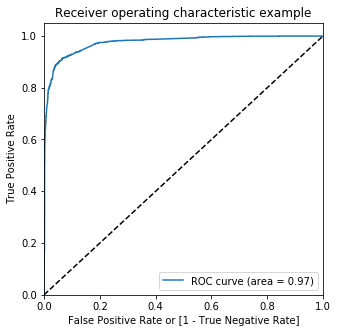

In [0]:
draw_roc(y_train_pred_final.Converted_actual, y_train_pred_final.Converted_Prob)

<font color = green> ROC or Reciever Operating Characteristic Curve is a plot that shows the diagnostic ability of binary classifiers. We know that the classifiers that give curves closer to top-left corner indicate a better performance. Also for good models, the AUC or Area Under Curve would be higher. In our ROC plot above, we can see we are getting good AUC and a good trade off between the Sensitivity and Specificity.

#### FINDING THE OPTIMAL CUT-OFF POINT

<font color = green> Till now we assigned the cut-off value randomly as 0.5 and saw for the performance of the model. Now we can findout the optimal cut off probability point based on the accuracy,sensitivity and specificity that the model gives.

In [0]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_actual,Lead_index,Converted_Prob,Converted_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,5279,0.014513,0,1,0,0,0,0,0,0,0,0,0
1,0,3099,0.380075,0,1,1,1,1,0,0,0,0,0,0
2,1,91,0.609167,1,1,1,1,1,1,1,1,0,0,0
3,1,1577,0.998015,1,1,1,1,1,1,1,1,1,1,1
4,0,487,0.204137,0,1,1,1,0,0,0,0,0,0,0


In [0]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted_actual, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.375063     1.000000     0.000000
0.1          0.1  0.850110     0.977447     0.773687
0.2          0.2  0.903739     0.936852     0.883866
0.3          0.3  0.923025     0.916554     0.926909
0.4          0.4  0.929115     0.896707     0.948565
0.5          0.5  0.931484     0.883175     0.960476
0.6          0.6  0.920149     0.837167     0.969951
0.7          0.7  0.916089     0.814163     0.977260
0.8          0.8  0.908983     0.782138     0.985111
0.9          0.9  0.891220     0.726207     0.990254


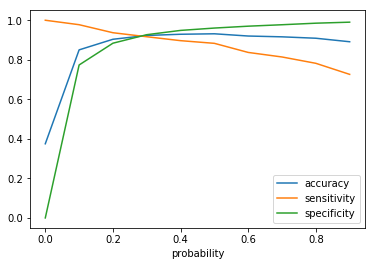

In [0]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

<font color = green> From the above plot between the Accuracy,Sensitivity and Specificity we can see, probability around 0.3 would be a good cut-off. For cut-off probability of 0.3, we getting accuracy of 92.3%,specificity of 92.7% and more importantly sensitivity of 91.7% 

In [0]:
y_train_pred_final['Final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted_actual,Lead_index,Converted_Prob,Converted_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,5279,0.014513,0,1,0,0,0,0,0,0,0,0,0,0
1,0,3099,0.380075,0,1,1,1,1,0,0,0,0,0,0,1
2,1,91,0.609167,1,1,1,1,1,1,1,1,0,0,0,1
3,1,1577,0.998015,1,1,1,1,1,1,1,1,1,1,1,1
4,0,487,0.204137,0,1,1,1,0,0,0,0,0,0,0,0


In [0]:
final_confusion = confusion_matrix(y_train_pred_final['Converted_actual'],y_train_pred_final['Final_predicted'])
print(final_confusion)

[[3424  270]
 [ 185 2032]]


In [0]:
# Predicted     not_churn    churn
# Actual
# not_churn        3424      270
# churn             185     2032

In [0]:
TP = final_confusion[1,1] # true positive 
TN = final_confusion[0,0] # true negatives
FP = final_confusion[0,1] # false positives
FN = final_confusion[1,0] # false negatives

In [0]:
#Sensitivity
TP / float(TP+FN)

0.9165539016689219

In [0]:
#Specificity
TN / float(TN+FP)

0.9269085002707093

In [0]:
#False Positive Rate
FP / float(FP+TN)

0.07309149972929074

In [0]:
#Positive Predictive Value
TP / float(TP+FP)

0.8827106863596872

In [0]:
#Negative Predictive Value
TN / float(TN+FN)

0.9487392629537268

<font color = green> So now we have taken the cut off 0.3 and seen for the confusion matrix and Sensitivyt and Specificity. We can see both Sensitivity and Specificity we are getting in the range around 91% which is really good value.

#### PRECISION AND RECALL 

In [0]:
precision = TP / float(TP+FP)

In [0]:
recall = TP / float(TP+FN)

In [0]:
from sklearn.metrics import precision_score, recall_score

In [0]:
precision_score(y_train_pred_final.Converted_actual, y_train_pred_final.Final_predicted)

0.8827106863596872

In [0]:
recall_score(y_train_pred_final.Converted_actual, y_train_pred_final.Final_predicted)

0.9165539016689219

In [0]:
from sklearn.metrics import precision_recall_curve

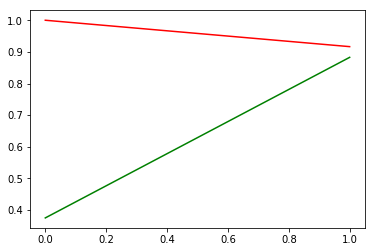

In [0]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted_actual, y_train_pred_final.Final_predicted)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

 #### TEST SET

<font color = green> We can now evaluate the model on the test dataset. For this we can transform our test dataset and then make predictions with the model we built before.

In [0]:
cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
X_test[cols] = scaler.transform(X_test[cols])

In [0]:
cols = list(X_train_RFE.columns)

In [0]:
X_test = X_test[cols]

In [0]:
y_test_pred = result.predict(sm.add_constant(X_test))

In [0]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [0]:
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead_index'] = y_test_df.index

In [0]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [0]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [0]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [0]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [0]:
y_pred_final.head()

,Converted,Lead_index,Converted_Prob,final_predicted
0,1,1926,0.978782,1
1,0,5654,0.893098,1
2,0,1209,0.010568,0
3,0,5234,0.003761,0
4,0,8497,0.001941,0


In [0]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.919889502762431

In [0]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1455,  131],
       [  72,  876]], dtype=int64)

In [0]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [0]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9240506329113924

In [0]:
# Let us calculate specificity
TN / float(TN+FP)

0.9174022698612863

<font color = green> Accuracy of 92%,Sensitivity of 92% and Specificity of 91% is what we get in the test dataset which are good figure indicating out model is performing really well on both the test and the train datasets.

<font color = green> We can now merge our dataframe with our predictor probabilities with the initial one with the Lead number and finally make a sincle dataframe with just Lead Number and the Score for the lead which is based on the probability we got from the model.

In [0]:
lead_df.head()

,Lead Number,Lead_index
0,660737,0
1,660728,1
2,660727,2
3,660719,3
4,660681,4


In [0]:
y_train_pred_final.head()

,Converted_actual,Lead_index,Converted_Prob,Converted_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,5279,0.014513,0,1,0,0,0,0,0,0,0,0,0,0
1,0,3099,0.380075,0,1,1,1,1,0,0,0,0,0,0,1
2,1,91,0.609167,1,1,1,1,1,1,1,1,0,0,0,1
3,1,1577,0.998015,1,1,1,1,1,1,1,1,1,1,1,1
4,0,487,0.204137,0,1,1,1,0,0,0,0,0,0,0,0


In [0]:
merged = pd.merge(lead_df,y_train_pred_final,on='Lead_index',how='inner')

In [0]:
merged.head()

,Lead Number,Lead_index,Converted_actual,Converted_Prob,Converted_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,660737,0,0,0.004696,0,1,0,0,0,0,0,0,0,0,0,0
1,660728,1,0,0.015676,0,1,0,0,0,0,0,0,0,0,0,0
2,660727,2,1,0.994907,1,1,1,1,1,1,1,1,1,1,1,1
3,660719,3,0,0.000428,0,1,0,0,0,0,0,0,0,0,0,0
4,660681,4,1,0.898501,1,1,1,1,1,1,1,1,1,1,0,1


In [0]:
merged2 = pd.merge(lead_df,y_pred_final,on='Lead_index',how='inner')

In [0]:
merged2.head()

,Lead Number,Lead_index,Converted,Converted_Prob,final_predicted
0,660570,11,1,0.998027,1
1,660553,14,0,0.118630,0
2,660522,18,1,0.530328,1
3,660458,24,1,0.997085,1
4,660424,27,1,0.992553,1


In [0]:
merged1 = merged[['Lead Number','Converted_Prob']]
merged2 = merged2[['Lead Number','Converted_Prob']]

In [0]:
merged1.shape[0] + merged2.shape[0]

8445

In [0]:
result = merged1.append(merged2)

In [0]:
result['Lead Score'] = round(100*result['Converted_Prob'])

In [0]:
result['Lead Score'] = result['Lead Score'].astype(int)

In [0]:
result.drop(['Converted_Prob'],axis=1,inplace=True)

In [0]:
result.head(20)

,Lead Number,Lead Score
0,660737,0
1,660728,2
2,660727,99
3,660719,0
4,660681,90
5,660680,4
6,660673,98
7,660664,4
8,660624,6
9,660616,18


<font color = green> <b> So our final dataset is with just the Lead Number and the Score(ranging from 0 to 100) which we assign to each of the lead which indicates which leads to concentrate more which are more potential leads.